<a href="https://colab.research.google.com/github/miaomiaozhang20/ec970_spring2024/blob/main/Prompt_Experiment_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up

In [ ]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.4/225.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.9.0 which is incompatible.


In [ ]:
import openai
from openai import OpenAI

from tqdm import tqdm
import random
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#openai.api_key = ''

client = OpenAI(
    # defaults to os.environ.get("OPENAI_API_KEY")
    api_key="",
)

## Execute

In [ ]:
import pandas as pd

# IRB url
url = 'https://docs.google.com/spreadsheets/d/1-IG3ZsIU_qrkpOYUvgsq0zL81n5rn0i8/export?format=xlsx'

# old url before IRB "https://docs.google.com/spreadsheets/d/1xVl-hOjDvzrxGcHmgvpUJP6KdxOwM5IB/export?format=xlsx"
df = pd.read_excel(url)

In [ ]:
adjectives_sol = ["highly detailed and elaborate", "succinct", "brief", "concise", "short", "comprehensive", "long", "5-paragraph", "3-paragraph", "medium-length"]

adjectives_prob = ["highly detailed and elaborate", "succinct", "brief", "concise", "short", "comprehensive", "long", "5-paragraph", "3-paragraph", "medium-length", "very precise and elaborate", "20-sentence"]

k = 125

random.seed(42)  # For reproducibility, if needed

adjectives_solution = random.choices(adjectives_sol, k=k)
adjectives_problem = random.choices(adjectives_prob, k=k)

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import re
from google.colab import files
from google.colab import drive
drive.mount('/content/gdrive')

import os
import datetime
import numpy as np

Mounted at /content/gdrive


In [ ]:
def make_distribution_length_plot(entries):
    # Separate problem and solution texts within each entry
    problem_texts = entries.str.extract(r"Problem: (.*?)Solution:", expand=False, flags=re.DOTALL)
    solution_texts = entries.str.extract(r"Solution: (.*)", expand=False, flags=re.DOTALL)

    # Handle multi-line solution texts by replacing newline characters with spaces
    problem_texts = problem_texts.str.replace('\n', ' ')
    solution_texts = solution_texts.str.replace('\n', ' ')

    # Calculate the lengths of problem and solution texts
    problem_lengths = problem_texts.str.len()
    solution_lengths = solution_texts.str.len()

    # Plotting the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(problem_lengths, bins=10, alpha=0.5, label='Problems')
    plt.hist(solution_lengths, bins=10, alpha=0.5, label='Solutions')
    plt.xlabel('Length')
    plt.ylabel('Frequency')
    plt.title('Histogram of Problem and Solution Lengths')
    plt.legend()
    plt.show()

In [ ]:
def create_df_answers(entries, p_list, s_list, persona, level_name):
    # Mount Google Drive
    folder_path = '/content/gdrive/My Drive/CircularEconAnswers'

    # Check if the folder exists, if not, create it
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    # Separate problem and solution texts within each entry
    problem_texts = entries.str.extract(r"Problem: (.*?)Solution:", expand=False, flags=re.DOTALL)
    solution_texts = entries.str.extract(r"Solution: (.*)", expand=False, flags=re.DOTALL)

    # Handle multi-line solution texts by replacing newline characters with spaces
    problem_texts = problem_texts.str.replace('\n', ' ')
    solution_texts = solution_texts.str.replace('\n', ' ')

    # Create a DataFrame using these lists
    df = pd.DataFrame({
        "level": level_name,
        "problem": problem_texts,
        "solution": solution_texts,
        "problem_adjective": p_list,
        "solution_adjective": s_list,
        "persona": persona if persona is not None else np.nan
    })

    # Get the current date and time, include up to minutes
    current_time = datetime.datetime.now().strftime("%Y%m%d_%H%M")

    # Save the DataFrame as a .csv file with datetime in filename in Google Drive folder
    csv_filename = f"{level_name}_{current_time}.csv"
    df.to_csv(os.path.join(folder_path, csv_filename), index=False)

    # Download the file to your local system
    files.download(os.path.join(folder_path, csv_filename))

    return df


# LEVEL 0: 100 instances, same prompt

In [ ]:
default_context_level0_concise = """ We are excited to announce an opportunity for freelancers to collaborate with researchers at the Digital, Data, and Design Institute at Harvard to source the most innovative and cutting-edge circular economy solutions for the business world.

Circular Economy is a simple idea.

Basically it involves sharing, leasing, reusing, repairing, refurbishing and recycling existing materials and products as long as possible.

We would like you to submit your circular economy idea, which can be a unique new idea or an existent idea that is used in the industry.

Here is an example: Car Sharing in order to reduce the carbon footprint associated with driving.

Submit your real-life use cases on how companies can implement the circular economy in their businesses. New ideas are also welcome, even if they are 'moonshots'. Your suggestions will help Harvard researchers understand the impact of the circular economy on business. Let's get creative and revolutionize the world through the circular economy!

Your goal is to win the top monetary prizes. Judges will use the following evaluation criteria:
* Novelty (How different is it from existing solutions?)
* Environmental Impact (How much does it benefit the planet?)
* Financial Impact (What financial value can it create for businesses?)
* Feasibility and Scalability of Implementation (How likely is it to succeed and how scalable is it?)
"""

In [ ]:
prompt_level_0_v2 = """Answer the following two questions to propose a circular economy idea that could win the challenge according to the evaluation criteria.

Problem: Tell us about the problem your solution is meant to solve.

Solution: Describe the solution in your own words.

Use the following template to answer:
Problem: <Write a high quality, concise1 answer.>
Solution: <Write a high quality, concise2 solution.>
"""

In [ ]:
import random

def generate_responses_level0_v4(n, prompt, column_name, default_context, adjectives_problem, adjectives_solution):
    # create an empty list to store the responses generated by the GPT-4 model
    responses = []
    adjectives_problem_list, adjectives_solution_list = [], []

    # iterate over each row in the input DataFrame using the iterrows() function,
    # which returns the index and the data of each row as a Series
    for i in tqdm(range(n)):
        # select a random adjective from the provided list
        adj1 = adjectives_problem[i]
        adj2 = adjectives_solution[i]

        adjectives_problem_list.append(adj1)
        adjectives_solution_list.append(adj2)
        # replace "concise" with the randomly selected adjective in the default context
        content = prompt.replace("concise1", adj1)
        content = content.replace("concise2", adj2)


        # call OpenAI's ChatCompletion.create method to generate a response from the GPT-4 model.
        # the "messages" parameter is a list of two dictionaries:
        # - the first dictionary represents a system message with the content string
        # - the second dictionary represents a user message with the provided prompt
        response = client.chat.completions.create(
            model="gpt-4",
            messages=[
                {"role": "system", "content": default_context},
                {"role": "user", "content": content}
            ])

        # assuming the response object has a 'choices' attribute that contains the response text,
        # extract the generated text from the response object and append it to the responses list
        responses.append(response.choices[0].message.content)
    # return the modified DataFrame
    return pd.Series(responses), pd.Series(adjectives_problem_list), pd.Series(adjectives_solution_list)


In [ ]:
def generate_responses_level0_v5(n, prompt, column_name, default_context, adjectives_problem, adjectives_solution):
    # create an empty list to store the responses generated by the GPT-4 model
    responses = []
    adjectives_problem_list, adjectives_solution_list = [], []

    # List to store the generation times
    generation_times = []

    # iterate over each row in the input DataFrame using the iterrows() function,
    # which returns the index and the data of each row as a Series
    for i in tqdm(range(n)):
        # select a random adjective from the provided list
        adj1 = adjectives_problem[i]
        adj2 = adjectives_solution[i]

        adjectives_problem_list.append(adj1)
        adjectives_solution_list.append(adj2)

        # replace "concise" with the randomly selected adjective in the default context
        content = prompt.replace("concise1", adj1)
        content = content.replace("concise2", adj2)

        # Start the timer
        start_time = time.time()

        # call OpenAI's ChatCompletion.create method to generate a response from the GPT-4 model.
        # the "messages" parameter is a list of two dictionaries:
        # - the first dictionary represents a system message with the content string
        # - the second dictionary represents a user message with the provided prompt
        response = client.chat.completions.create(
            model="gpt-4",
            messages=[
                {"role": "system", "content": default_context},
                {"role": "user", "content": content}
            ])

        # Stop the timer
        end_time = time.time()

        # Append the time taken to the list
        generation_times.append(end_time - start_time)

        # assuming the response object has a 'choices' attribute that contains the response text,
        # extract the generated text from the response object and append it to the responses list
        responses.append(response.choices[0].message.content)

    # Compute the required statistics
    min_time = np.min(generation_times)
    max_time = np.max(generation_times)
    avg_time = np.mean(generation_times)
    std_time = np.std(generation_times)

    print(f"Min Generation Time: {min_time} seconds")
    print(f"Max Generation Time: {max_time} seconds")
    print(f"Average Generation Time: {avg_time} seconds")
    print(f"Standard Deviation of Generation Time: {std_time} seconds")

    # return the modified DataFrame
    return pd.Series(responses), pd.Series(adjectives_problem_list), pd.Series(adjectives_solution_list)

In [ ]:
# TODO Change n
n_answers = 1 #TODO Change to 100
responses, p_list, s_list = generate_responses_level0_v4(n_answers, prompt_level_0_v2, 'LEVEL0', default_context_level0_concise, adjectives_problem, adjectives_solution)
create_df_answers(responses, p_list, s_list, persona = None, level_name = "Level0")

100%|██████████| 1/1 [00:16<00:00, 16.37s/it]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,level,problem,solution,problem_adjective,solution_adjective,persona
0,Level0,The Housing Industry is responsible for approx...,"A digital platform for 'House Sharing', simila...",concise,long,NaN


### Refined response code

In [ ]:
import time
import numpy as np
import pandas as pd
from tqdm import tqdm

# Other necessary imports and setup code (e.g., OpenAI's client setup) go here

def refine_response(response, default_context):
    # Instructions for the model to critique and improve the response
    improvement_prompt = """Given the initial response below, first explain what could be better and how it can be improved according to the challenge criteria (reminder: Novelty, Environmental Impact, Financial Impact, Feasibility and Scalability of Implementation). Then, provide the improved answer in the format of Problem and Solution.

    Initial Response: {}
    """.format(response)

    # Call the API to generate the improved response
    refined = client.chat.completions.create(
        model="gpt-4",
        messages=[
            {"role": "system", "content": default_context},
            {"role": "user", "content": improvement_prompt}
        ])

    # Return the refined response
    return refined.choices[0].message.content

def generate_and_refine_responses(n, prompt, default_context, adjectives_problem, adjectives_solution):
    responses, p_list, s_list = generate_responses_level0_v4(n, prompt, 'LEVEL0', default_context, adjectives_problem, adjectives_solution)

    # Iterate over the initial responses and refine each one
    refined_responses = []
    for response in responses:
        refined = refine_response(response, default_context)
        refined_responses.append(refined)

    # Return the refined responses along with the original adjective lists
    return pd.Series(refined_responses), p_list, s_list

# Example usage
n_answers = 1
refined_responses, p_list, s_list = generate_and_refine_responses(n_answers, prompt_level_0_v2, default_context_level0_concise, adjectives_problem, adjectives_solution)
create_df_answers(refined_responses, p_list, s_list, persona=None, level_name="Level0_Refined")


100%|██████████| 1/1 [00:36<00:00, 36.41s/it]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,level,problem,solution,problem_adjective,solution_adjective,persona
0,Level0_Refined,Plastic waste management is an urgent global c...,We propose a new approach to convert plastic w...,concise,long,NaN


In [ ]:
refined_responses[0]

'The initial response is quite comprehensive, addressing all four evaluation criteria in some capacity. The problem is well outlined and the solution is targeting important socio-economic issues. However, there are areas where it can still be improved:\n\n* Novelty: The concept of converting plastic waste to biofuel is not particularly novel. Various initiatives already exist that use this method for waste management. To improve the novelty, it might be useful to integrate a unique element that adds value or efficiency to the existing solutions.\n\n* Environmental Impact: While the solution does demonstrate a significant environmental impact, it could further explain the long-term effects of this proposed change. \n\n* Financial Impact: This response could provide a more robust explanation surrounding the profitability of such an operation. Who are the stakeholders benefiting financially? How would the revenue be generated?\n\n* Feasibility and Scalability of Implementation: Though the

In [ ]:
# TODO Change n
n_answers = 50 #TODO Change to 100
responses, p_list, s_list = generate_responses_level0_v5(n_answers, prompt_level_0_v2, 'LEVEL0', default_context_level0_concise, adjectives_problem, adjectives_solution)
create_df_answers(responses, p_list, s_list, persona = None, level_name = "Level0")

100%|██████████| 50/50 [20:52<00:00, 25.04s/it]

Min Generation Time: 5.907939910888672 seconds
Max Generation Time: 39.17173194885254 seconds
Average Generation Time: 25.042018957138062 seconds
Standard Deviation of Generation Time: 7.56144832407211 seconds


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,level,problem,solution,problem_adjective,solution_adjective,persona
0,Level0,The fashion industry contributes to 10% of glo...,My solution proposes a network of community-ba...,concise,long,NaN
1,Level0,The current global fashion industry operates o...,"In response to this issue, an idea for a circu...",highly detailed and elaborate,highly detailed and elaborate,NaN
2,Level0,"As we observe the travesty of disposable ""fast...",A holistic approach to this problem is creatin...,20-sentence,brief,NaN
3,Level0,One significant problem confronting our planet...,My proposal for a circular economy solution is...,very precise and elaborate,brief,NaN
4,Level0,The fashion industry has been pointed out as o...,The proposed solution is to develop a 'Fashion...,medium-length,5-paragraph,NaN
5,Level0,A massive amount of food waste is generated gl...,My proposal is to develop a digitally intercon...,concise,long,NaN
6,Level0,One of the major contributors to global pollut...,"To tackle this problem, a digital platform cou...",highly detailed and elaborate,3-paragraph,NaN
7,Level0,Traditional single-use packaging in the food a...,My solution is introducing a refillable packag...,very precise and elaborate,highly detailed and elaborate,NaN
8,Level0,An increasing problem in the urban lifestyle i...,My solution is to create a furniture as a serv...,20-sentence,short,NaN
9,Level0,The apparel industry is a significant contribu...,My proposal orbits around the idea of implemen...,succinct,highly detailed and elaborate,NaN


For version 1, the model will retain the history of previous versions and feedback to inform further improvements. For version 2, each iteration will start fresh, with only the default context and the most recent problem-solution pair.

In [ ]:
def iterative_refine_with_history(response, default_context, iterations):
    history = ""
    current_response = response

    for i in range(iterations):
        # Add the previous iterations and responses to the history
        history += "\n\nIteration {}: {}\nFeedback and Improvement: ".format(i + 1, current_response)

        # Generate the improvement prompt including the history
        improvement_prompt = f"Review the following response and its improvement history. Provide feedback and an improved version of the response. Reminder of the challenge criteria: Novelty, Environmental Impact, Financial Impact, Feasibility and Scalability of Implementation. \n{history}\n\nCurrent Response: {current_response}"

        # Call the API to generate the improved response
        refined = client.chat.completions.create(
            model="gpt-4",
            messages=[
                {"role": "system", "content": default_context},
                {"role": "user", "content": improvement_prompt}
            ])

        # Update the current response with the refined one
        current_response = refined.choices[0].message.content

    return current_response


In [ ]:
def parse_problem_solution(response):
    # Implement a method to extract the problem and solution from the response
    # This is a placeholder and should be replaced with actual parsing logic
    problem = "Extracted Problem"
    solution = "Extracted Solution"
    return problem, solution

def iterative_refine_fresh_start(response, default_context, iterations):
    current_response = response

    for i in range(iterations):
        problem, solution = parse_problem_solution(current_response)
        # Construct the prompt with the latest problem and solution
        content = f"Problem: {problem}\nSolution: {solution}"

        # Call the API to generate the improved response
        refined = client.chat.completions.create(
            model="gpt-4",
            messages=[
                {"role": "system", "content": default_context},
                {"role": "user", "content": content}
            ])

        # Update the current response with the refined one
        current_response = refined.choices[0].message.content

    return current_response


In [ ]:
import re


def parse_problem_solution(response):
    # Use regular expressions to extract the problem and solution from the response
    problem_match = re.search(r"Problem: (.*?)Solution:", response, re.DOTALL)
    solution_match = re.search(r"Solution: (.*)", response, re.DOTALL)

    # Extract the problem and solution texts if matches are found
    problem = problem_match.group(1).strip() if problem_match else "Problem not found"
    solution = solution_match.group(1).strip() if solution_match else "Solution not found"

    return problem, solution

def iterative_refine_fresh_start(response, default_context, iterations, model="gpt-4"):
    current_response = response

    for i in range(iterations):
        problem, solution = parse_problem_solution(current_response)

        # Construct the prompt with the latest problem and solution
        improvement_prompt = f"""Given the initial response below, first explain what could be better and how it can be improved according to the challenge criteria (reminder: Novelty, Environmental Impact, Financial Impact, Feasibility, and Scalability of Implementation). Then, provide the improved answer in the format of Problem and Solution.

Initial Response:
Problem: {problem}
Solution: {solution}
"""

        # Call the API to generate the improved response
        refined = openai.ChatCompletion.create(
            model=model,
            messages=[
                {"role": "system", "content": default_context},
                {"role": "user", "content": improvement_prompt}
            ])

        # Update the current response with the refined one
        current_response = refined.choices[0].message.content

    return current_response


# Example usage
initial_response = "Problem: Excessive waste generation.\nSolution: Implement a recycling program."


Problem: 

The fashion industry is the second-largest consumer of water and is responsible for 10% of the global carbon emissions - double that of international aviation. Around 85% of all textiles go to dump each year and washing clothes releases half a million tonnes of plastic microfibers into the ocean annually.

Solution:

Introducing a "Clothing as a Service" model. This means instead of selling clothes, fashion brands could lease them for a period of time. After wearing the clothes, consumers can return them to be cleaned, repaired if necessary, and leased to someone else. As part of the service, brands could also offer a repair service for clothes, which will extend their lifecycle.

This will significantly reduce the need for producing new clothes thereby reducing water consumption, carbon emissions, and waste. It will also create a continuous revenue stream for businesses and provide consumers with the opportunity to access a wide range of clothing at lower prices. 

This ide

In [ ]:
# Example usage for Version 1
refined_response_v1 = iterative_refine_with_history(initial_response, default_context_level0_concise, 3)  # 3 rounds of refinement

# Example usage for Version 2
refined_response_v2 = iterative_refine_fresh_start(initial_response, default_context_level0_concise, 3)  # 3 rounds of refinement


In [ ]:
refined_response_v2 = iterative_refine_fresh_start(initial_response, default_context_level0_concise, 3)  # 3 rounds of refinement


In [ ]:
refined_response_v1

"Feedback: The latest version of the response captures an overview of the environmental and financial benefits of the solution. However, the response could further emphasize on the feasibility of the solution, as well as provide more concrete examples to demonstrate it's scalability. The role of government regulations and incentives could also be discussed to reflect the realistic implementation landscape of the solution. \n\nImproved Version:\n\nProblem: Rampant waste generation in high-waste industries like electronics, heavy machinery, and packaged goods manufacturing, is resulting in further environmental degradation.\n\nSolution: Companies should invest in cutting-edge waste sorting and recycling technologies driven by AI and robotics. The adoption of such technologies in the production line will not only sort the manufacturing waste efficiently but it will effectively identify and separate recyclable materials which have potential resale value. These reclaimed materials can be so

In [ ]:
refined_response_v2

'Problem: Single-use plastic packaging is ubiquitous in our current economy, leading to waste deposition in landfills and oceans, negatively impacting marine life and contributing to climate change.\n\nSolution: Implement a refill-based supply chain for consumer goods, particularly grocery and household items, moving towards a zero-waste model. Retail companies can partner with manufacturers to develop refill stations for various products such as soaps, detergents, and food items like grains and pulses, thus eliminating the need for one-time use packaging.\n\nCustomers can bring their own reusable containers, or purchase one with their initial product purchase. They then return to the refill station as needed, paying by weight or volume, encouraging re-use and reduction in waste. This is not only an environmentally friendly practice but also a financially effective one, as customers need not pay for the packaging each time they buy the product.\n\nTo make this more attractive to busine

In [ ]:
import time

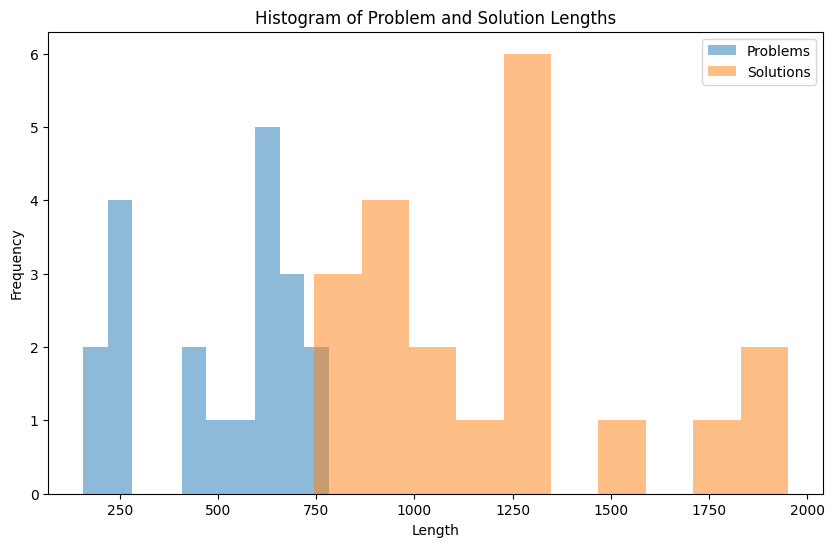

In [ ]:
make_distribution_length_plot(responses)

In [ ]:
for t in responses:
  print(t, "/n")

Problem: Plastic waste has become a significant global issue, causing severe harm to the environment, wildlife and human health because it does not decompose quickly. Meanwhile, the fashion industry is infamous for a high rate of production and dumping after short-term usage. 

Solution: My proposition is a platform where businesses can convert recovered plastic waste into eco-friendly, recycled fabric for the fashion industry. This platform would connect several stakeholders: plastic waste collectors, recycling facilities, fabric producers, and fashion brands. Companies that recycle plastics into textiles can cater to fashion brands interested in sustainable manufacturing. This not only helps reduce the carbon footprint significantly but also creates job opportunities and financial viability. While the recycling and fabric conversion process may require some investment upfront, the long-term benefits for both environment and society make it a good business proposition. Plus, with risi

# LEVEL 1: 100 instances with persona

In [ ]:
default_context = """ We are excited to announce an opportunity for freelancers to collaborate with researchers at the Digital, Data, and Design Institute at Harvard to source the most innovative and cutting-edge circular economy solutions for the business world.

Circular Economy is a simple idea.

Basically it involves sharing, leasing, reusing, repairing, refurbishing and recycling existing materials and products as long as possible.

We would like you to submit your circular economy idea, which can be a unique new idea or an existent idea that is used in the industry.

Here is an example: Car Sharing in order to reduce the carbon footprint associated with driving.

Submit your real-life use cases on how companies can implement the circular economy in their businesses. New ideas are also welcome, even if they are 'moonshots'. Your suggestions will help Harvard researchers understand the impact of the circular economy on business. Let's get creative and revolutionize the world through the circular economy!

Your goal is to win the top monetary prizes by satisfying to the maximum the following evaluation criteria.
* Novelty (How different is it from existing solutions?)
* Environmental Impact (How much does it benefit the planet?)
* Financial Impact (What financial value can it create for businesses?)
* Feasibility and Scalability of Implementation (How likely is it to succeed and how scalable is it?)

To answer the question, you will take the perspective of the following persona:
"""


prompt_level_1_middle = """Answer the following two questions to propose a circular economy idea that could win the challenge according to the evaluation criteria.

Problem: Tell us about the problem your solution is meant to solve.

Solution: Describe the solution in your own words.

Use the following template to answer:
Problem: <Write a high quality, concise1 answer, corresponding to the personality, inspiration, and knowledge of your persona.>
Solution: <Write a high quality, concise2 solution, corresponding to the personality, inspiration, and knowledge of your persona.>
"""

In [ ]:
# TODO Adapt with latest sheet

import pandas as pd

# Assuming your original DataFrame is called 'df'

# Create a new DataFrame with the sentence column
new_df = df.copy()
new_df["sentence"] = ""

# Iterate over each row and generate the sentence
for index, row in new_df.iterrows():
    sentence = ""

    if not pd.isna(row["New.Job.Title"]):
        sentence += f"You are a {row['New.Job.Title']},"

    if not pd.isna(row["continent"]):
        if sentence:
            sentence += " located in"
        sentence += f" {row['continent']}."

    if not pd.isna(row["New.Industry.of.Solution"]):
        if sentence:
            sentence += " You propose a solution that applies to"
        sentence += f" {row['New.Industry.of.Solution']}."

    if not pd.isna(row["What.is.the.maturity.of.the.solution."]):
        if sentence:
            sentence += " The maturity of your solution is"
        sentence += f" {row['What.is.the.maturity.of.the.solution.']}."

    new_df.at[index, "sentence"] = sentence

In [ ]:
def generate_responses_error(df, prompt, column_name, default_context, adjectives_problem, adjectives_solution):
    responses = []
    adjectives_problem_list, adjectives_solution_list = [], []

    for i, row in tqdm(df.iterrows(), total=df.shape[0]):

        adj1 = adjectives_problem[i]
        adj2 = adjectives_solution[i]

        adjectives_problem_list.append(adj1)
        adjectives_solution_list.append(adj2)
        # replace "concise" with the randomly selected adjective in the default context
        new_prompt = prompt.replace("concise1", adj1)
        new_prompt = new_prompt.replace("concise2", adj2)

        content = default_context + row["sentence"]

        try:
            response = openai.ChatCompletion.create(
                model="gpt-4",
                messages=[
                    {"role": "system", "content": content},
                    {"role": "user", "content": new_prompt}
                ])
            responses.append(response['choices'][0]['message']['content'])
        except Exception as e:
            print(f"Error on row {i}: {e}")
            response = openai.ChatCompletion.create(
                model="gpt-4",
                messages=[
                    {"role": "system", "content": content},
                    {"role": "user", "content": new_prompt}
                ])
            responses.append(response['choices'][0]['message']['content'])
    return pd.Series(responses), pd.Series(adjectives_problem_list), pd.Series(adjectives_solution_list)



In [ ]:
def generate_responses_error_v2(df, prompt, column_name, default_context, adjectives_problem, adjectives_solution):
    responses = []
    adjectives_problem_list, adjectives_solution_list = [], []

    # List to store the generation times
    generation_times = []

    for i, row in tqdm(df.iterrows(), total=df.shape[0]):

        adj1 = adjectives_problem[i]
        adj2 = adjectives_solution[i]

        adjectives_problem_list.append(adj1)
        adjectives_solution_list.append(adj2)

        # replace "concise" with the randomly selected adjective in the default context
        new_prompt = prompt.replace("concise1", adj1)
        new_prompt = new_prompt.replace("concise2", adj2)

        content = default_context + row["sentence"]

        # Start the timer
        start_time = time.time()

        try:
            response = openai.ChatCompletion.create(
                model="gpt-4",
                messages=[
                    {"role": "system", "content": content},
                    {"role": "user", "content": new_prompt}
                ])
            responses.append(response['choices'][0]['message']['content'])
        except Exception as e:
            print(f"Error on row {i}: {e}")
            response = openai.ChatCompletion.create(
                model="gpt-4",
                messages=[
                    {"role": "system", "content": content},
                    {"role": "user", "content": new_prompt}
                ])
            responses.append(response['choices'][0]['message']['content'])

        # Stop the timer and store the generation time
        end_time = time.time()
        generation_times.append(end_time - start_time)

    # Compute the required statistics
    min_time = np.min(generation_times)
    max_time = np.max(generation_times)
    avg_time = np.mean(generation_times)
    std_time = np.std(generation_times)

    print(f"Min Generation Time: {min_time} seconds")
    print(f"Max Generation Time: {max_time} seconds")
    print(f"Average Generation Time: {avg_time} seconds")
    print(f"Standard Deviation of Generation Time: {std_time} seconds")

    return pd.Series(responses), pd.Series(adjectives_problem_list), pd.Series(adjectives_solution_list)


In [ ]:
n = 1 #TODO Change to 100
level1_middle, p_list, s_list = generate_responses_error(new_df[:n], prompt_level_1_middle, 'LEVEL1',  default_context, adjectives_problem, adjectives_solution)
create_df_answers(level1_middle, p_list, s_list, persona = new_df["sentence"][:n], level_name = "Level1")

100%|██████████| 1/1 [00:52<00:00, 52.23s/it]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,level,problem,solution,problem_adjective,solution_adjective,persona
0,Level1,"Africa, being one of the most densely populate...",My solution is a multi-faceted approach titled...,concise,long,"You are a Executives, Managers, and Entreprene..."


In [ ]:
import time

In [ ]:
n = 50 #TODO Change to 100
level1_middle, p_list, s_list = generate_responses_error_v2(new_df[:n], prompt_level_1_middle, 'LEVEL1',  default_context, adjectives_problem, adjectives_solution)
create_df_answers(level1_middle, p_list, s_list, persona = new_df["sentence"][:n], level_name = "Level1")

100%|██████████| 50/50 [24:13<00:00, 29.06s/it]

Min Generation Time: 17.08103060722351 seconds
Max Generation Time: 80.7933030128479 seconds
Average Generation Time: 29.062119975090027 seconds
Standard Deviation of Generation Time: 9.77943126932716 seconds


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,level,problem,solution,problem_adjective,solution_adjective,persona
0,Level1,"In many African nations, especially urban area...",Our proposed solution is “Agri-Ambiti” (Agricu...,concise,long,"You are a Executives, Managers, and Entreprene..."
1,Level1,One of the biggest challenges that Africa face...,"To tackle these challenges, I propose a robust...",highly detailed and elaborate,highly detailed and elaborate,"You are a Executives, Managers, and Entreprene..."
2,Level1,"In Africa, particularly in the rapidly expandi...","My proposed solution is a holistic, eco-indust...",20-sentence,brief,"You are a Executives, Managers, and Entreprene..."
3,Level1,One of the most critical issues we face in Afr...,I propose the establishment of Circular Waste ...,very precise and elaborate,brief,"You are a Executives, Managers, and Entreprene..."
4,Level1,The African continent is grappling with two si...,My proposition is to establish an Integrated W...,medium-length,5-paragraph,"You are a Executives, Managers, and Entreprene..."
5,Level1,Africa faces a significant waste management pr...,"I propose the creation of a wide-scale, cross-...",concise,long,"You are a Executives, Managers, and Entreprene..."
6,Level1,"In Africa, a major problem that can be address...",The solution I propose tackles this issue he...,highly detailed and elaborate,3-paragraph,"You are a Executives, Managers, and Entreprene..."
7,Level1,The African continent is currently experiencin...,Our solution proposes an integrative and compr...,very precise and elaborate,highly detailed and elaborate,"You are a Executives, Managers, and Entreprene..."
8,Level1,"The ever-growing consumer demand for Apparel, ...","I propose a ""Product as a Service"" model for o...",20-sentence,short,"You are a Executives, Managers, and Entreprene..."
9,Level1,The current “take-make-waste” industrial model...,"My solution, baptized as InfinityLoop, is a te...",succinct,highly detailed and elaborate,"You are a Executives, Managers, and Entreprene..."


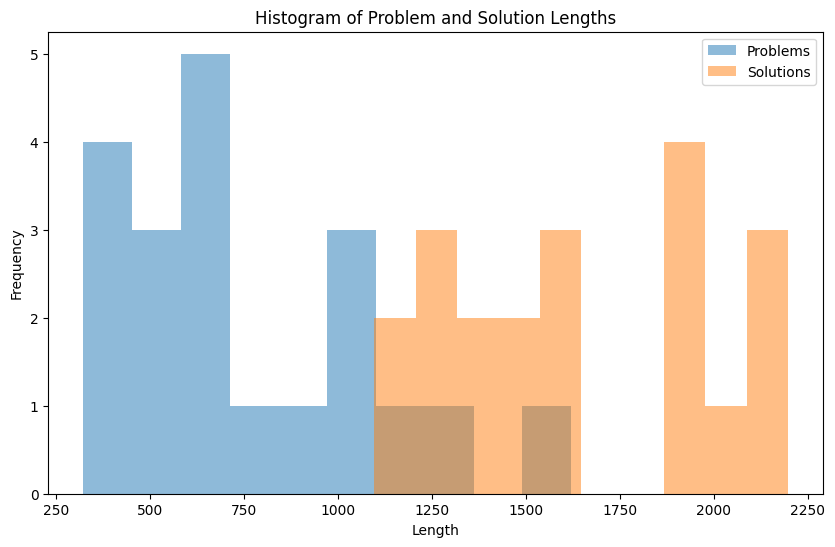

In [ ]:
make_distribution_length_plot(level1_middle)

In [ ]:
for t in level1_middle:
    print(t)

Problem: A significant problem in various industries, such as Apparel & Textiles, Automobiles & Tires, Electronics, Construction, and Packaging, is the production waste and the accumulation of discarded products. These often end up in landfills, causing environmental pollution and wasting valuable resources. For businesses, this also represents a financial drain as materials are continually purchased, used, and discarded.

Solution: I propose a Resource Recovery and Repurposing (RRR) Network. The concept is built around the idea of collaborative consumption and a 'materials-as-a-service' model. At its core, the RRR Network will be a digital platform that connects companies across industries looking to dispose of their waste with other businesses who can reuse, recycle, or repurpose these materials — essentially, an 'Uber' for waste materials. The RRR Network will not only reduce waste but also open new revenue streams for companies that sell their waste and offer cost savings for busin

# Level 2

In [ ]:
experts_list_23fields_5experts = [
    ("Stella McCartney", "Apparel & Textiles"),
    ("Eileen Fisher", "Apparel & Textiles"),
    ("Yvon Chouinard", "Apparel & Textiles"),
    ("Carry Somers", "Apparel & Textiles"),
    ("Orsola de Castro", "Apparel & Textiles"),

    ("Elon Musk", "Automobiles & Tires"),
    ("Carlos Tavares", "Automobiles & Tires"),
    ("Akio Toyoda", "Automobiles & Tires"),
    ("Mary Barra", "Automobiles & Tires"),
    ("Mate Rimac", "Automobiles & Tires"),

    ("John Mackey", "Beverages"),
    ("Denise Morrison", "Beverages"),
    ("Emmanuel Faber", "Beverages"),
    ("Howard Schultz", "Beverages"),
    ("James Quincey", "Beverages"),

    ("Dave Lennard", "Building Products"),
    ("William McDonough", "Building Products"),
    ("Thomas Rau", "Building Products"),
    ("Andy Karsner", "Building Products"),
    ("Michael Green", "Building Products"),

    ("Rick Fedrizzi", "Buildings"),
    ("Barry Giles", "Buildings"),
    ("Edward Mazria", "Buildings"),
    ("James Timberlake", "Buildings"),
    ("Stephen Kieran", "Buildings"),

    ("Scott Wine", "Construction Machinery"),
    ("Max Guinn", "Construction Machinery"),
    ("Raoul Jacquand", "Construction Machinery"),
    ("Martin Weissburg", "Construction Machinery"),
    ("Tom Linebarger", "Construction Machinery"),

    ("Andrew Liveris", "Construction Materials"),
    ("Bertrand Collomb", "Construction Materials"),
    ("John Elkington", "Construction Materials"),
    ("Bill Browning", "Construction Materials"),
    ("Jan Jenisch", "Construction Materials"),

    ("Tim Cook", "Consumer Electronics"),
    ("Ren Zhengfei", "Consumer Electronics"),
    ("Satya Nadella", "Consumer Electronics"),
    ("Jensen Huang", "Consumer Electronics"),
    ("Kenichiro Yoshida", "Consumer Electronics"),

    ("Anthony Pratt", "Containers & Packaging"),
    ("Mark Vergnano", "Containers & Packaging"),
    ("Stefan De Loecker", "Containers & Packaging"),
    ("John Hayes", "Containers & Packaging"),
    ("Ramon Laguarta", "Containers & Packaging"),

    ("Fabrizio Freda", "Cosmetics"),
    ("Jean-Paul Agon", "Cosmetics"),
    ("David Greenberg", "Cosmetics"),
    ("Sue Y. Nabi", "Cosmetics"),
    ("Alex Keith", "Cosmetics"),

    ("Hubertus Muehlhaeuser", "Electrical Equipment"),
    ("Simon Segars", "Electrical Equipment"),
    ("Uday Yadav", "Electrical Equipment"),
    ("Joe Hogan", "Electrical Equipment"),
    ("Eric Rondolat", "Electrical Equipment"),

    ("Larry Fink", "Financials"),
    ("Catherine Howarth", "Financials"),
    ("Anne Finucane", "Financials"),
    ("David Blood", "Financials"),
    ("Ray Dalio", "Financials"),

    ("John Mackey", "Food"),
    ("Denise Morrison", "Food"),
    ("Emmanuel Faber", "Food"),
    ("Howard Schultz", "Food"),
    ("James Quincey", "Food"),

    ("Anders Thomas", "Forest Products"),
    ("Berry Wiersum", "Forest Products"),
    ("Luke A. Finlay III", "Forest Products"),
    ("Paul Polman", "Forest Products"),
    ("William L. Kovacs", "Forest Products"),

    ("Alex Gorsky", "Health Care Products"),
    ("Stefan De Loecker", "Health Care Products"),
    ("Emma Walmsley", "Health Care Products"),
    ("Leif Johansson", "Health Care Products"),
    ("Severin Schwan", "Health Care Products"),

    ("Andrew Martin", "Home Furnishings"),
    ("Patricia Urquiola", "Home Furnishings"),
    ("Thomas Rau", "Home Furnishings"),
    ("Marcus Engman", "Home Furnishings"),
    ("Mette Hay", "Home Furnishings"),

    ("Mark Bitzer", "Household Appliances"),
    ("Pat Bassett", "Household Appliances"),
    ("William L. McComb", "Household Appliances"),
    ("Kevin Nolan", "Household Appliances"),
    ("Uwe Raschke", "Household Appliances"),

    ("Darius Adamczyk", "Industrial Machinery"),
    ("Scott Wine", "Industrial Machinery"),
    ("Greg Hayes", "Industrial Machinery"),
    ("Nick Blazquez", "Industrial Machinery"),
    ("Jeff Immelt", "Industrial Machinery"),

    ("Oleg Deripaska", "Metals: Beyond Big 4"),
    ("Richard Adkerson", "Metals: Beyond Big 4"),
    ("Ivan Glasenberg", "Metals: Beyond Big 4"),
    ("Mark Cutifani", "Metals: Beyond Big 4"),
    ("Mark Eames", "Metals: Beyond Big 4"),

    ("Sundar Pichai", "Software & IT Services"),
    ("Lisa P. Jackson", "Software & IT Services"),
    ("Satya Nadella", "Software & IT Services"),
    ("Marc Benioff", "Software & IT Services"),
    ("Arvind Krishna", "Software & IT Services"),

    ("Tim Cook", "Technology/ Hardware Products"),
    ("Lisa Su", "Technology/ Hardware Products"),
    ("Pat Gelsinger", "Technology/ Hardware Products"),
    ("Jensen Huang", "Technology/ Hardware Products"),
    ("Michael Dell", "Technology/ Hardware Products"),

    ("Frederick W. Smith", "Transportation & Logistics"),
    ("David Abney", "Transportation & Logistics"),
    ("Richard Anderson", "Transportation & Logistics"),
    ("James Foote", "Transportation & Logistics"),
    ("Lance Fritz", "Transportation & Logistics"),

    ("David Steiner", "Waste Management"),
    ("Patrick Dovigi", "Waste Management"),
    ("Ronald Mittelstaedt", "Waste Management"),
    ("Darren Gruendel", "Waste Management"),
    ("Richard Burke", "Waste Management")
]

random.shuffle(experts_list_23fields_5experts)
df_experts_23fields_5experts = pd.DataFrame(experts_list_23fields_5experts, columns=["persona", "field"])

In [ ]:
def generate_responses_error_level2(df, prompt, column_name, default_context, adjectives_problem, adjectives_solution):
    responses = []
    adjectives_problem_list, adjectives_solution_list = [], []

    for i, row in tqdm(df.iterrows(), total=df.shape[0]):
        sentence_persona = "You are "+ row["persona"] + " an expert in " + row["field"] +"."

        adj1 = adjectives_problem[i]
        adj2 = adjectives_solution[i]
        adjectives_problem_list.append(adj1)
        adjectives_solution_list.append(adj2)
        # replace "concise" with the randomly selected adjective in the default context
        new_prompt = prompt.replace("concise1", adj1)
        new_prompt = new_prompt.replace("concise2", adj2)

        content = default_context + sentence_persona
        try:
            response = openai.ChatCompletion.create(
                model="gpt-4",
                messages=[
                    {"role": "system", "content": content},
                    {"role": "user", "content": new_prompt}
                ])
            responses.append(response['choices'][0]['message']['content'])
        except Exception as e:
            print(f"Error on row {i}: {e}")
            response = openai.ChatCompletion.create(
                model="gpt-4",
                messages=[
                    {"role": "system", "content": content},
                    {"role": "user", "content": new_prompt}
                ])
            responses.append(response['choices'][0]['message']['content'])

    return pd.Series(responses), pd.Series(adjectives_problem_list), pd.Series(adjectives_solution_list)


In [ ]:
def generate_responses_error_level2_v2(df, prompt, column_name, default_context, adjectives_problem, adjectives_solution):
    responses = []
    adjectives_problem_list, adjectives_solution_list = [], []

    # List to store the generation times
    generation_times = []

    for i, row in tqdm(df.iterrows(), total=df.shape[0]):
        sentence_persona = "You are "+ row["persona"] + " an expert in " + row["field"] +"."

        adj1 = adjectives_problem[i]
        adj2 = adjectives_solution[i]
        adjectives_problem_list.append(adj1)
        adjectives_solution_list.append(adj2)

        # replace "concise" with the randomly selected adjective in the default context
        new_prompt = prompt.replace("concise1", adj1)
        new_prompt = new_prompt.replace("concise2", adj2)

        content = default_context + sentence_persona

        # Start the timer
        start_time = time.time()

        try:
            response = openai.ChatCompletion.create(
                model="gpt-4",
                messages=[
                    {"role": "system", "content": content},
                    {"role": "user", "content": new_prompt}
                ])
            responses.append(response['choices'][0]['message']['content'])
        except Exception as e:
            print(f"Error on row {i}: {e}")
            response = openai.ChatCompletion.create(
                model="gpt-4",
                messages=[
                    {"role": "system", "content": content},
                    {"role": "user", "content": new_prompt}
                ])
            responses.append(response['choices'][0]['message']['content'])

        # Stop the timer and store the generation time
        end_time = time.time()
        generation_times.append(end_time - start_time)

    # Compute the required statistics
    min_time = np.min(generation_times)
    max_time = np.max(generation_times)
    avg_time = np.mean(generation_times)
    std_time = np.std(generation_times)

    print(f"Min Generation Time: {min_time} seconds")
    print(f"Max Generation Time: {max_time} seconds")
    print(f"Average Generation Time: {avg_time} seconds")
    print(f"Standard Deviation of Generation Time: {std_time} seconds")

    return pd.Series(responses), pd.Series(adjectives_problem_list), pd.Series(adjectives_solution_list)


In [ ]:
# TODO Change n
n = 1
level2_middle, p_list, s_list = generate_responses_error_level2(df_experts_23fields_5experts[:n], prompt_level_1_middle, 'LEVEL2', default_context, adjectives_problem, adjectives_solution)
create_df_answers(level2_middle, p_list, s_list, persona = df_experts_23fields_5experts["persona"][:n], level_name = "Level2")

100%|██████████| 1/1 [00:29<00:00, 29.22s/it]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,level,problem,solution,problem_adjective,solution_adjective,persona
0,Level2,A significant issue in the healthcare industry...,The initiation of a Medical Equipment Reuse Pr...,concise,long,Severin Schwan


In [ ]:
# TODO Change n
n = 20
level2_middle, p_list, s_list = generate_responses_error_level2_v2(df_experts_23fields_5experts[:n], prompt_level_1_middle, 'LEVEL2', default_context, adjectives_problem, adjectives_solution)
create_df_answers(level2_middle, p_list, s_list, persona = df_experts_23fields_5experts["persona"][:n], level_name = "Level2")

100%|██████████| 20/20 [09:13<00:00, 27.66s/it]

Min Generation Time: 18.001070022583008 seconds
Max Generation Time: 39.02120351791382 seconds
Average Generation Time: 27.654498648643493 seconds
Standard Deviation of Generation Time: 6.366837342570214 seconds


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,level,problem,solution,problem_adjective,solution_adjective,persona
0,Level2,The rapid expansion of the global digital econ...,"I propose a holistic solution named ""e-Cycle"" ...",concise,long,Sundar Pichai
1,Level2,A significant portion of the environmental foo...,"My proposal introduces a ""Resource Lifecycle M...",highly detailed and elaborate,highly detailed and elaborate,Greg Hayes
2,Level2,The packaging industry is undeniably one of th...,The implementation of a 'Packaging as a Servic...,20-sentence,brief,Mark Vergnano
3,Level2,The consumer electronics industry is notorious...,"Shifting towards a ""Reuse, Recycle, Recover"" m...",very precise and elaborate,brief,Kenichiro Yoshida
4,Level2,The problem we're trying to tackle is credit-b...,We propose a financial solution by creating a ...,medium-length,5-paragraph,Anne Finucane
5,Level2,The construction industry is highly resource-i...,My proposition is to implement a Construction ...,concise,long,Scott Wine
6,Level2,"In the household appliances industry, a large ...","I propose a ""Lease and Upgrade"" model, inspire...",highly detailed and elaborate,3-paragraph,Mark Bitzer
7,Level2,The world has frequently been battling disease...,"I propose a ""Close-Looped Healthcare Ecosystem...",very precise and elaborate,highly detailed and elaborate,Stefan De Loecker
8,Level2,A prominent issue in the forest products secto...,"As an expert in forest products, I propose the...",20-sentence,short,Anders Thomas
9,Level2,A significant environmental issue currently fa...,"Our solution, ""Appliance Life Extension Progra...",succinct,highly detailed and elaborate,Uwe Raschke


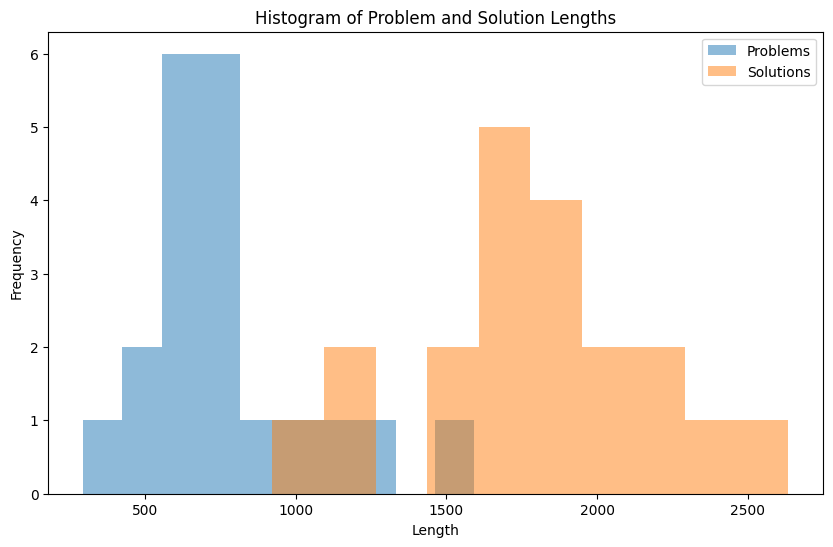

In [ ]:
make_distribution_length_plot(level2_middle)

In [ ]:
for i, t in enumerate(level2_middle):
    print(df_experts_23fields_5experts.iloc[i,0], df_experts_23fields_5experts.iloc[i,1])
    print(t)

Severin Schwan Health Care Products
Problem: The healthcare industry often utilizes single-use products, mainly for reasons ensuring safety and sterility. From single-use surgical tools to disposable healthcare gowns, these items contribute significantly to the volume of medical waste. The World Health Organization estimates that high-income countries produce up to 0.5 kg of hazardous waste per person daily. Additionally, it's not just the wastage that's a problem, but the manufacturing process of these health care products also carries a significant carbon footprint due to the resources and energy consumed. There is a detriment to the environment due to these practices. However, given the high degree of sensitive healthcare requirements, it is challenging to find a balance that takes into account both environmental conservation and patient needs.

Solution: I propose a solution called "SteriCycle". The idea behind SteriCycle is to establish a robust sterilizing system that allows dura

# LEVEL A: 1 instance but no persona

In [ ]:
default_context_levelA = """ We are excited to announce an opportunity for freelancers to collaborate with researchers at the Digital, Data, and Design Institute at Harvard to source the most innovative and cutting-edge circular economy solutions for the business world.

Circular Economy is a simple idea.

Basically it involves sharing, leasing, reusing, repairing, refurbishing and recycling existing materials and products as long as possible.

We would like you to submit your circular economy idea, which can be a unique new idea or an existent idea that is used in the industry.

Here is an example: Car Sharing in order to reduce the carbon footprint associated with driving.

Submit your real-life use cases on how companies can implement the circular economy in their businesses. New ideas are also welcome, even if they are 'moonshots'. Your suggestions will help Harvard researchers understand the impact of the circular economy on business. Let's get creative and revolutionize the world through the circular economy!

Your goal is to win the top monetary prizes by satisfying to the maximum the following evaluation criteria.
* Novelty (How different is it from existing solutions?)
* Environmental Impact (How much does it benefit the planet?)
* Financial Impact (What financial value can it create for businesses?)
* Feasibility and Scalability of Implementation (How likely is it to succeed and how scalable is it?)

Answer the following two questions to propose a circular economy idea that could win the challenge according to the evaluation criteria.

Problem: Tell us about the problem your solution is meant to solve.

Solution: Describe the solution in your own words.

Use the following template to answer:
Problem: <Write a high quality answer.>
Solution: <Write a high quality solution.>

We will ask to answer these questions several times, and make sure each new answer tackles a different problem than the previous ones and proposes a different solution."""


In [ ]:
import random
import time
from tqdm import tqdm
import pandas as pd
import openai

def estimate_token_count(message):
    """
    Rough estimation of token count. Real token count could be different.
    """
    return len(message.split())

def generate_responses_levelA(df, column_name, default_context, adjectives_problem, adjectives_solution):
    responses = []
    adjectives_problem_list, adjectives_solution_list = [], []

    total_tokens = estimate_token_count(default_context)
    messages = [{"role": "system", "content": default_context}]

    for i, row in tqdm(df.iterrows(), total=df.shape[0]):
        content = "Give a new high quality, concise1 Problem and high quality, concise2 Solution. Make sure to tackle a different problem than the previous ones and propose a different solution. Make also sure your answers satisfy the evaluation criteria (novelty, environmental impact, financial impact, feasibility and scalability)."

        # select a random adjective from the provided list
        adj1 = adjectives_problem[i]
        adj2 = adjectives_solution[i]
        adjectives_problem_list.append(adj1)
        adjectives_solution_list.append(adj2)
        # replace "concise" with the randomly selected adjective in the default context
        content = content.replace("concise1", adj1)
        content = content.replace("concise2", adj2)
        tokens_in_content = estimate_token_count(content)

        if total_tokens + tokens_in_content > 7000:
            if len(messages) > 2:
                # Remove the 2nd and 3rd message
                removed_message_2 = messages.pop(1)  # Remove second message
                total_tokens -= estimate_token_count(removed_message_2["content"])
                if len(messages) > 1:
                    removed_message_3 = messages.pop(1)  # Remove third message (which is now at the second position after the previous pop)
                    total_tokens -= estimate_token_count(removed_message_3["content"])

        try:
            messages.append({"role": "user", "content": content})
            total_tokens += tokens_in_content
            response = openai.ChatCompletion.create(
                model="gpt-4",
                messages=messages
            )
            model_response = response['choices'][0]['message']['content']
            total_tokens += estimate_token_count(model_response)
            messages.pop()
            responses.append(model_response)
            messages.append({"role": "system", "content": model_response})
        except openai.error.RateLimitError as e:
            print(f"Rate limit error, sleeping for 10 seconds. Error details: {e}")
            time.sleep(20)
            continue  # Skip the rest of this iteration and go to the next one
        except Exception as e:
            print(f"Error on row {i}: {e}")
    return pd.Series(responses), messages, pd.Series(adjectives_problem_list), pd.Series(adjectives_solution_list)


In [ ]:
# TODO CHANGE TO 100 AND HANDLE PROBLEM
n = 125
levelA, m, p_list, s_list = generate_responses_levelA(new_df[:n], 'LEVELA', default_context_levelA, adjectives_problem, adjectives_solution)
create_df_answers(levelA, p_list, s_list, persona = None, level_name = "LevelA")

100%|██████████| 125/125 [1:01:13<00:00, 29.39s/it]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,level,problem,solution,problem_adjective,solution_adjective,persona
0,LevelA,Electronic waste (e-waste) is a rapidly growin...,The proposed solution is to create a platform ...,concise,long,NaN
1,LevelA,"The fashion industry, specifically fast fashio...",The solution to this environmental crisis lies...,highly detailed and elaborate,highly detailed and elaborate,NaN
2,LevelA,The construction and demolition industry contr...,The development of an innovative construction ...,20-sentence,brief,NaN
3,LevelA,The food service industry contributes signific...,The solution proposed is a Sustainable Food Se...,very precise and elaborate,brief,NaN
4,LevelA,The plastic packaging industry is one of the l...,The proposed solution is the creation of an ac...,medium-length,5-paragraph,NaN
...,...,...,...,...,...,...
120,LevelA,The fashion industry is notoriously wasteful a...,An 'Eco-Fashion Revolution Initiative' could a...,3-paragraph,5-paragraph,NaN
121,LevelA,Single-use packaging represents a major source...,The ‘Sustainable Packaging Solutions Initiativ...,brief,comprehensive,NaN
122,LevelA,Construction and demolition waste is a signifi...,The ‘Building Materials Reuse and Recycling In...,short,5-paragraph,NaN
123,LevelA,The electronic industry’s rapid innovation cyc...,The ‘Electronics Lifecycle Enhancement Initiat...,3-paragraph,comprehensive,NaN


In [ ]:
for i, t in enumerate(levelA):
    print("Answer", i, "\n", t,"\n")

Answer 0 
 Problem: The fashion industry is one of the largest polluting industries in the world. It contributes to 10% of global greenhouse gas emissions due to its long supply chains and energy-intensive production. Moreover, the industry’s water consumption footprint, waste generation (in terms of unused clothes and non-biodegradable materials), and the excessive use of harmful chemical dyes, are major concerning factors. Fast fashion trends exacerbate these problems further by promoting a Throwaway Culture, where clothes are worn only a few times before being discarded.

Solution: Introducing a 'Closed-Loop Fashion Cycle': This concept involves creation of apparel using only recyclable or biodegradable materials, recycling and repurposing discarded clothes, reducing overproduction, and incentivizing slow fashion. Here’s more elaboration:

1. Biodegradable Apparel: Collaborate with researchers and inventors to design trendy fashion using sustainable and biodegradable materials like 

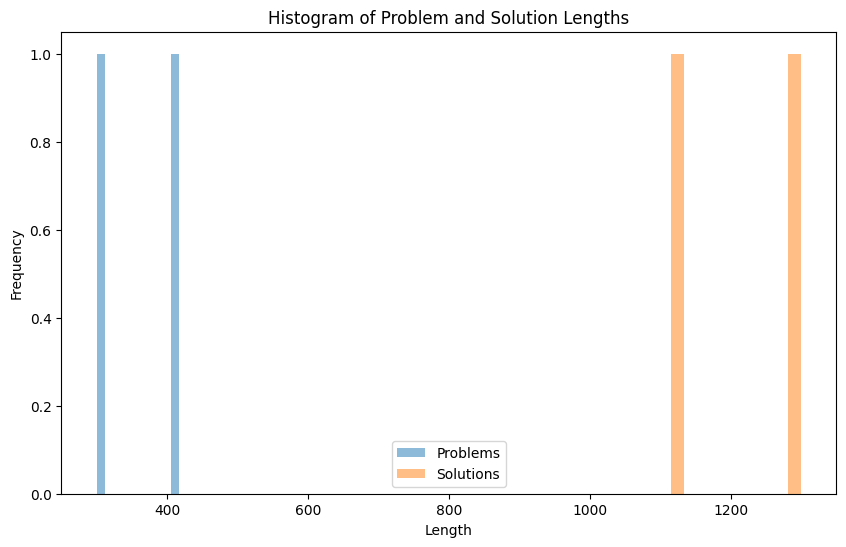

In [ ]:
make_distribution_length_plot(levelA)

# LEVEL B 1 instance, actual personas

In [ ]:
def generate_responses_levelB(df, column_name, default_context, adjectives_problem, adjectives_solution):
    responses = []
    adjectives_problem_list, adjectives_solution_list = [], []

    total_tokens = estimate_token_count(default_context)
    messages = [{"role": "system", "content": default_context}]

    for i, row in tqdm(df.iterrows(), total=df.shape[0]):
        content = "Give a new high quality, concise1 Problem and high quality, concise2 Solution. Make sure to tackle a different problem than the previous ones and propose a different solution. Make also sure your answers satisfy the evaluation criteria (novelty, environmental impact, financial impact, feasibility and scalability). The persona you embody for this answer:"
        content = content + row["sentence"]
        # select a random adjective from the provided list
        adj1 = adjectives_problem[i]
        adj2 = adjectives_solution[i]
        adjectives_problem_list.append(adj1)
        adjectives_solution_list.append(adj2)
        # replace "concise" with the randomly selected adjective in the default context
        content = content.replace("concise1", adj1)
        content = content.replace("concise2", adj2)
        tokens_in_content = estimate_token_count(content)

        if total_tokens + tokens_in_content > 7000:
            if len(messages) > 2:
                # Remove the 2nd and 3rd message
                removed_message_2 = messages.pop(1)  # Remove second message
                total_tokens -= estimate_token_count(removed_message_2["content"])
                if len(messages) > 1:
                    removed_message_3 = messages.pop(1)  # Remove third message (which is now at the second position after the previous pop)
                    total_tokens -= estimate_token_count(removed_message_3["content"])

        try:
            messages.append({"role": "user", "content": content})
            total_tokens += tokens_in_content

            response = openai.ChatCompletion.create(
                model="gpt-4",
                messages=messages
            )
            model_response = response['choices'][0]['message']['content']
            total_tokens += estimate_token_count(model_response)
            messages.pop()
            responses.append(model_response)
            messages.append({"role": "system", "content": model_response})
        except openai.error.RateLimitError as e:
            print(f"Rate limit error, sleeping for 10 seconds. Error details: {e}")
            time.sleep(20)
            continue  # Skip the rest of this iteration and go to the next one
        except Exception as e:
            print(f"Error on row {i}: {e}")
    return pd.Series(responses), messages, pd.Series(adjectives_problem_list), pd.Series(adjectives_solution_list)


In [ ]:
default_context_levelB = """
We are excited to announce an opportunity for freelancers to collaborate with researchers at the Digital, Data, and Design Institute at Harvard to source the most innovative and cutting-edge circular economy solutions for the business world.

Circular Economy is a simple idea.

Basically it involves sharing, leasing, reusing, repairing, refurbishing and recycling existing materials and products as long as possible.

We would like you to submit your circular economy idea, which can be a unique new idea or an existent idea that is used in the industry.

Here is an example: Car Sharing in order to reduce the carbon footprint associated with driving.

Submit your real-life use cases on how companies can implement the circular economy in their businesses. New ideas are also welcome, even if they are 'moonshots'. Your suggestions will help Harvard researchers understand the impact of the circular economy on business. Let's get creative and revolutionize the world through the circular economy!

Your goal is to win the top monetary prizes by satisfying to the maximum the following evaluation criteria.
* Novelty (How different is it from existing solutions?)
* Environmental Impact (How much does it benefit the planet?)
* Financial Impact (What financial value can it create for businesses?)
* Feasibility and Scalability of Implementation (How likely is it to succeed and how scalable is it?)

Answer the following two questions to propose a circular economy idea that could win the challenge according to the evaluation criteria.

Problem: Tell us about the problem your solution is meant to solve.

Solution: Describe the solution in your own words.

Answer following this template:
Problem: <Write a high quality answer, corresponding to the personality, inspiration, and knowledge of your persona.>
Solution: <Write a high quality solution, corresponding to the personality, inspiration, and knowledge of your persona.>

We will give you a series of different personas, and make sure each new answer from each persona tackles a different problem than the previous ones and proposes a different solution. Make sure each answer to correspond to the perspective, characteristics, and knowledge of your persona.
"""

In [ ]:
# TODO Change to 125
n = 125

levelB_middle, m, p_list, s_list = generate_responses_levelB(new_df[:n], 'LEVELB', default_context_levelB, adjectives_problem, adjectives_solution)
create_df_answers(levelB_middle, p_list, s_list, persona = new_df["sentence"][:n], level_name = "LevelB")

100%|██████████| 1/1 [00:30<00:00, 30.24s/it]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,level,problem,solution,problem_adjective,solution_adjective,persona
0,LevelB,"In Africa, most perishable food items produced...","I propose a circular solution, which we might ...",concise,long,"You are a Executives, Managers, and Entreprene..."


In [ ]:
for t in levelB_middle:
    print(t,"\n")

Problem: The fashion and apparel industry is notorious for being the second-largest polluter in the world. Many items go to waste, either at the production stage or because they are discarded by consumers after a few uses. This unsustainable consumption model not only harms the environment severely but also wastes a vast amount of resources that could otherwise have been recycled or repurposed.

Solution: My solution to the problem is a proof of concept called Loop Threads, designed for scalability in the apparel and textiles segment, but with potential implications for everything from building products to consumer electronics. 

Loop Threads is a pioneering circular economy platform that would allow fashion brands and retailers to take back their clothing from consumers after they are done with them. The platform uses RFID and Blockchain technology to track the lifecycle of each piece of clothing from its creation, sale, usage, and return to the manufacturer. 

Once returned, the clot

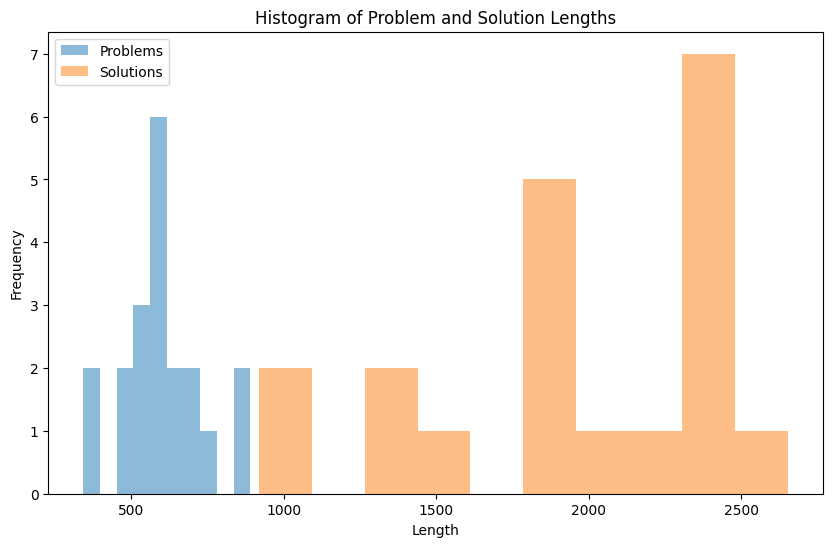

In [ ]:
make_distribution_length_plot(levelB_middle)

# LEVEL C 1 instance, real-world experts

In [ ]:
def generate_responses_levelC(df, column_name, default_context, adjectives_problem, adjectives_solution):
    responses = []
    adjectives_problem_list, adjectives_solution_list = [], []

    total_tokens = estimate_token_count(default_context)
    messages = [{"role": "system", "content": default_context}]

    for i, row in tqdm(df.iterrows(), total=df.shape[0]):
        content = "Give a new high quality, concise1 Problem and high quality, concise2 Solution. Make sure to tackle a different problem than the previous ones and propose a different solution. Make also sure your answers satisfy the evaluation criteria (novelty, environmental impact, financial impact, feasibility and scalability). The persona you embody for this answer: "
        content = content + row["persona"]+" who has expertise in "+row["field"] + "."
        # select a random adjective from the provided list
        adj1 = adjectives_problem[i]
        adj2 = adjectives_solution[i]

        adjectives_problem_list.append(adj1)
        adjectives_solution_list.append(adj2)
        # replace "concise" with the randomly selected adjective in the default context
        content = content.replace("concise1", adj1)
        content = content.replace("concise2", adj2)
        tokens_in_content = estimate_token_count(content)

        if total_tokens + tokens_in_content > 7000:
            if len(messages) > 2:
                # Remove the 2nd and 3rd message
                removed_message_2 = messages.pop(1)  # Remove second message
                total_tokens -= estimate_token_count(removed_message_2["content"])
                if len(messages) > 1:
                    removed_message_3 = messages.pop(1)  # Remove third message (which is now at the second position after the previous pop)
                    total_tokens -= estimate_token_count(removed_message_3["content"])

        try:
            messages.append({"role": "user", "content": content})
            total_tokens += tokens_in_content
            response = openai.ChatCompletion.create(
                model="gpt-4",
                messages=messages
            )
            print(messages)
            model_response = response['choices'][0]['message']['content']
            total_tokens += estimate_token_count(model_response)
            messages.pop()
            responses.append(model_response)
            messages.append({"role": "system", "content": model_response})
        except openai.error.RateLimitError as e:
            print(f"Rate limit error, sleeping for 10 seconds. Error details: {e}")
            time.sleep(20)
            continue  # Skip the rest of this iteration and go to the next one
        except Exception as e:
            print(f"Error on row {i}: {e}")
    return pd.Series(responses), messages, pd.Series(adjectives_problem_list), pd.Series(adjectives_solution_list)


In [ ]:
# TODO change n
n = 125

levelC, m, p_list, s_list = generate_responses_levelC(df_experts_23fields_5experts[:n], 'LEVELC', default_context_levelB, adjectives_problem, adjectives_solution)
create_df_answers(levelC, p_list, s_list, persona = df_experts_23fields_5experts["persona"][:n], level_name = "LevelC")

  1%|          | 1/115 [00:22<42:37, 22.43s/it]

[{'role': 'system', 'content': "\nWe are excited to announce an opportunity for freelancers to collaborate with researchers at the Digital, Data, and Design Institute at Harvard to source the most innovative and cutting-edge circular economy solutions for the business world.\n\nCircular Economy is a simple idea.\n\nBasically it involves sharing, leasing, reusing, repairing, refurbishing and recycling existing materials and products as long as possible.\n\nWe would like you to submit your circular economy idea, which can be a unique new idea or an existent idea that is used in the industry.\n\nHere is an example: Car Sharing in order to reduce the carbon footprint associated with driving.\n\nSubmit your real-life use cases on how companies can implement the circular economy in their businesses. New ideas are also welcome, even if they are 'moonshots'. Your suggestions will help Harvard researchers understand the impact of the circular economy on business. Let's get creative and revoluti

  2%|▏         | 2/115 [00:52<50:26, 26.79s/it]

[{'role': 'system', 'content': "\nWe are excited to announce an opportunity for freelancers to collaborate with researchers at the Digital, Data, and Design Institute at Harvard to source the most innovative and cutting-edge circular economy solutions for the business world.\n\nCircular Economy is a simple idea.\n\nBasically it involves sharing, leasing, reusing, repairing, refurbishing and recycling existing materials and products as long as possible.\n\nWe would like you to submit your circular economy idea, which can be a unique new idea or an existent idea that is used in the industry.\n\nHere is an example: Car Sharing in order to reduce the carbon footprint associated with driving.\n\nSubmit your real-life use cases on how companies can implement the circular economy in their businesses. New ideas are also welcome, even if they are 'moonshots'. Your suggestions will help Harvard researchers understand the impact of the circular economy on business. Let's get creative and revoluti

  3%|▎         | 3/115 [01:13<45:32, 24.39s/it]

[{'role': 'system', 'content': "\nWe are excited to announce an opportunity for freelancers to collaborate with researchers at the Digital, Data, and Design Institute at Harvard to source the most innovative and cutting-edge circular economy solutions for the business world.\n\nCircular Economy is a simple idea.\n\nBasically it involves sharing, leasing, reusing, repairing, refurbishing and recycling existing materials and products as long as possible.\n\nWe would like you to submit your circular economy idea, which can be a unique new idea or an existent idea that is used in the industry.\n\nHere is an example: Car Sharing in order to reduce the carbon footprint associated with driving.\n\nSubmit your real-life use cases on how companies can implement the circular economy in their businesses. New ideas are also welcome, even if they are 'moonshots'. Your suggestions will help Harvard researchers understand the impact of the circular economy on business. Let's get creative and revoluti

  3%|▎         | 4/115 [01:35<43:25, 23.48s/it]

[{'role': 'system', 'content': "\nWe are excited to announce an opportunity for freelancers to collaborate with researchers at the Digital, Data, and Design Institute at Harvard to source the most innovative and cutting-edge circular economy solutions for the business world.\n\nCircular Economy is a simple idea.\n\nBasically it involves sharing, leasing, reusing, repairing, refurbishing and recycling existing materials and products as long as possible.\n\nWe would like you to submit your circular economy idea, which can be a unique new idea or an existent idea that is used in the industry.\n\nHere is an example: Car Sharing in order to reduce the carbon footprint associated with driving.\n\nSubmit your real-life use cases on how companies can implement the circular economy in their businesses. New ideas are also welcome, even if they are 'moonshots'. Your suggestions will help Harvard researchers understand the impact of the circular economy on business. Let's get creative and revoluti

  4%|▍         | 5/115 [02:06<47:31, 25.92s/it]

[{'role': 'system', 'content': "\nWe are excited to announce an opportunity for freelancers to collaborate with researchers at the Digital, Data, and Design Institute at Harvard to source the most innovative and cutting-edge circular economy solutions for the business world.\n\nCircular Economy is a simple idea.\n\nBasically it involves sharing, leasing, reusing, repairing, refurbishing and recycling existing materials and products as long as possible.\n\nWe would like you to submit your circular economy idea, which can be a unique new idea or an existent idea that is used in the industry.\n\nHere is an example: Car Sharing in order to reduce the carbon footprint associated with driving.\n\nSubmit your real-life use cases on how companies can implement the circular economy in their businesses. New ideas are also welcome, even if they are 'moonshots'. Your suggestions will help Harvard researchers understand the impact of the circular economy on business. Let's get creative and revoluti

  5%|▌         | 6/115 [02:44<54:46, 30.15s/it]

[{'role': 'system', 'content': "\nWe are excited to announce an opportunity for freelancers to collaborate with researchers at the Digital, Data, and Design Institute at Harvard to source the most innovative and cutting-edge circular economy solutions for the business world.\n\nCircular Economy is a simple idea.\n\nBasically it involves sharing, leasing, reusing, repairing, refurbishing and recycling existing materials and products as long as possible.\n\nWe would like you to submit your circular economy idea, which can be a unique new idea or an existent idea that is used in the industry.\n\nHere is an example: Car Sharing in order to reduce the carbon footprint associated with driving.\n\nSubmit your real-life use cases on how companies can implement the circular economy in their businesses. New ideas are also welcome, even if they are 'moonshots'. Your suggestions will help Harvard researchers understand the impact of the circular economy on business. Let's get creative and revoluti

  6%|▌         | 7/115 [03:13<53:28, 29.70s/it]

[{'role': 'system', 'content': "\nWe are excited to announce an opportunity for freelancers to collaborate with researchers at the Digital, Data, and Design Institute at Harvard to source the most innovative and cutting-edge circular economy solutions for the business world.\n\nCircular Economy is a simple idea.\n\nBasically it involves sharing, leasing, reusing, repairing, refurbishing and recycling existing materials and products as long as possible.\n\nWe would like you to submit your circular economy idea, which can be a unique new idea or an existent idea that is used in the industry.\n\nHere is an example: Car Sharing in order to reduce the carbon footprint associated with driving.\n\nSubmit your real-life use cases on how companies can implement the circular economy in their businesses. New ideas are also welcome, even if they are 'moonshots'. Your suggestions will help Harvard researchers understand the impact of the circular economy on business. Let's get creative and revoluti

  7%|▋         | 8/115 [03:49<56:29, 31.68s/it]

[{'role': 'system', 'content': "\nWe are excited to announce an opportunity for freelancers to collaborate with researchers at the Digital, Data, and Design Institute at Harvard to source the most innovative and cutting-edge circular economy solutions for the business world.\n\nCircular Economy is a simple idea.\n\nBasically it involves sharing, leasing, reusing, repairing, refurbishing and recycling existing materials and products as long as possible.\n\nWe would like you to submit your circular economy idea, which can be a unique new idea or an existent idea that is used in the industry.\n\nHere is an example: Car Sharing in order to reduce the carbon footprint associated with driving.\n\nSubmit your real-life use cases on how companies can implement the circular economy in their businesses. New ideas are also welcome, even if they are 'moonshots'. Your suggestions will help Harvard researchers understand the impact of the circular economy on business. Let's get creative and revoluti

  8%|▊         | 9/115 [04:09<49:31, 28.03s/it]

[{'role': 'system', 'content': "\nWe are excited to announce an opportunity for freelancers to collaborate with researchers at the Digital, Data, and Design Institute at Harvard to source the most innovative and cutting-edge circular economy solutions for the business world.\n\nCircular Economy is a simple idea.\n\nBasically it involves sharing, leasing, reusing, repairing, refurbishing and recycling existing materials and products as long as possible.\n\nWe would like you to submit your circular economy idea, which can be a unique new idea or an existent idea that is used in the industry.\n\nHere is an example: Car Sharing in order to reduce the carbon footprint associated with driving.\n\nSubmit your real-life use cases on how companies can implement the circular economy in their businesses. New ideas are also welcome, even if they are 'moonshots'. Your suggestions will help Harvard researchers understand the impact of the circular economy on business. Let's get creative and revoluti

  9%|▊         | 10/115 [04:44<52:51, 30.20s/it]

[{'role': 'system', 'content': "\nWe are excited to announce an opportunity for freelancers to collaborate with researchers at the Digital, Data, and Design Institute at Harvard to source the most innovative and cutting-edge circular economy solutions for the business world.\n\nCircular Economy is a simple idea.\n\nBasically it involves sharing, leasing, reusing, repairing, refurbishing and recycling existing materials and products as long as possible.\n\nWe would like you to submit your circular economy idea, which can be a unique new idea or an existent idea that is used in the industry.\n\nHere is an example: Car Sharing in order to reduce the carbon footprint associated with driving.\n\nSubmit your real-life use cases on how companies can implement the circular economy in their businesses. New ideas are also welcome, even if they are 'moonshots'. Your suggestions will help Harvard researchers understand the impact of the circular economy on business. Let's get creative and revoluti

 10%|▉         | 11/115 [05:09<49:46, 28.71s/it]

[{'role': 'system', 'content': "\nWe are excited to announce an opportunity for freelancers to collaborate with researchers at the Digital, Data, and Design Institute at Harvard to source the most innovative and cutting-edge circular economy solutions for the business world.\n\nCircular Economy is a simple idea.\n\nBasically it involves sharing, leasing, reusing, repairing, refurbishing and recycling existing materials and products as long as possible.\n\nWe would like you to submit your circular economy idea, which can be a unique new idea or an existent idea that is used in the industry.\n\nHere is an example: Car Sharing in order to reduce the carbon footprint associated with driving.\n\nSubmit your real-life use cases on how companies can implement the circular economy in their businesses. New ideas are also welcome, even if they are 'moonshots'. Your suggestions will help Harvard researchers understand the impact of the circular economy on business. Let's get creative and revoluti

 10%|█         | 12/115 [05:46<53:45, 31.32s/it]

[{'role': 'system', 'content': "\nWe are excited to announce an opportunity for freelancers to collaborate with researchers at the Digital, Data, and Design Institute at Harvard to source the most innovative and cutting-edge circular economy solutions for the business world.\n\nCircular Economy is a simple idea.\n\nBasically it involves sharing, leasing, reusing, repairing, refurbishing and recycling existing materials and products as long as possible.\n\nWe would like you to submit your circular economy idea, which can be a unique new idea or an existent idea that is used in the industry.\n\nHere is an example: Car Sharing in order to reduce the carbon footprint associated with driving.\n\nSubmit your real-life use cases on how companies can implement the circular economy in their businesses. New ideas are also welcome, even if they are 'moonshots'. Your suggestions will help Harvard researchers understand the impact of the circular economy on business. Let's get creative and revoluti

 11%|█▏        | 13/115 [06:24<56:16, 33.10s/it]

[{'role': 'system', 'content': "\nWe are excited to announce an opportunity for freelancers to collaborate with researchers at the Digital, Data, and Design Institute at Harvard to source the most innovative and cutting-edge circular economy solutions for the business world.\n\nCircular Economy is a simple idea.\n\nBasically it involves sharing, leasing, reusing, repairing, refurbishing and recycling existing materials and products as long as possible.\n\nWe would like you to submit your circular economy idea, which can be a unique new idea or an existent idea that is used in the industry.\n\nHere is an example: Car Sharing in order to reduce the carbon footprint associated with driving.\n\nSubmit your real-life use cases on how companies can implement the circular economy in their businesses. New ideas are also welcome, even if they are 'moonshots'. Your suggestions will help Harvard researchers understand the impact of the circular economy on business. Let's get creative and revoluti

 12%|█▏        | 14/115 [06:43<48:45, 28.97s/it]

[{'role': 'system', 'content': "\nWe are excited to announce an opportunity for freelancers to collaborate with researchers at the Digital, Data, and Design Institute at Harvard to source the most innovative and cutting-edge circular economy solutions for the business world.\n\nCircular Economy is a simple idea.\n\nBasically it involves sharing, leasing, reusing, repairing, refurbishing and recycling existing materials and products as long as possible.\n\nWe would like you to submit your circular economy idea, which can be a unique new idea or an existent idea that is used in the industry.\n\nHere is an example: Car Sharing in order to reduce the carbon footprint associated with driving.\n\nSubmit your real-life use cases on how companies can implement the circular economy in their businesses. New ideas are also welcome, even if they are 'moonshots'. Your suggestions will help Harvard researchers understand the impact of the circular economy on business. Let's get creative and revoluti

 13%|█▎        | 15/115 [07:19<51:50, 31.10s/it]

[{'role': 'system', 'content': "\nWe are excited to announce an opportunity for freelancers to collaborate with researchers at the Digital, Data, and Design Institute at Harvard to source the most innovative and cutting-edge circular economy solutions for the business world.\n\nCircular Economy is a simple idea.\n\nBasically it involves sharing, leasing, reusing, repairing, refurbishing and recycling existing materials and products as long as possible.\n\nWe would like you to submit your circular economy idea, which can be a unique new idea or an existent idea that is used in the industry.\n\nHere is an example: Car Sharing in order to reduce the carbon footprint associated with driving.\n\nSubmit your real-life use cases on how companies can implement the circular economy in their businesses. New ideas are also welcome, even if they are 'moonshots'. Your suggestions will help Harvard researchers understand the impact of the circular economy on business. Let's get creative and revoluti

 14%|█▍        | 16/115 [07:52<52:15, 31.67s/it]

[{'role': 'system', 'content': "\nWe are excited to announce an opportunity for freelancers to collaborate with researchers at the Digital, Data, and Design Institute at Harvard to source the most innovative and cutting-edge circular economy solutions for the business world.\n\nCircular Economy is a simple idea.\n\nBasically it involves sharing, leasing, reusing, repairing, refurbishing and recycling existing materials and products as long as possible.\n\nWe would like you to submit your circular economy idea, which can be a unique new idea or an existent idea that is used in the industry.\n\nHere is an example: Car Sharing in order to reduce the carbon footprint associated with driving.\n\nSubmit your real-life use cases on how companies can implement the circular economy in their businesses. New ideas are also welcome, even if they are 'moonshots'. Your suggestions will help Harvard researchers understand the impact of the circular economy on business. Let's get creative and revoluti

 15%|█▍        | 17/115 [08:12<46:02, 28.19s/it]

[{'role': 'system', 'content': "\nWe are excited to announce an opportunity for freelancers to collaborate with researchers at the Digital, Data, and Design Institute at Harvard to source the most innovative and cutting-edge circular economy solutions for the business world.\n\nCircular Economy is a simple idea.\n\nBasically it involves sharing, leasing, reusing, repairing, refurbishing and recycling existing materials and products as long as possible.\n\nWe would like you to submit your circular economy idea, which can be a unique new idea or an existent idea that is used in the industry.\n\nHere is an example: Car Sharing in order to reduce the carbon footprint associated with driving.\n\nSubmit your real-life use cases on how companies can implement the circular economy in their businesses. New ideas are also welcome, even if they are 'moonshots'. Your suggestions will help Harvard researchers understand the impact of the circular economy on business. Let's get creative and revoluti

 16%|█▌        | 18/115 [08:44<47:08, 29.16s/it]

[{'role': 'system', 'content': "\nWe are excited to announce an opportunity for freelancers to collaborate with researchers at the Digital, Data, and Design Institute at Harvard to source the most innovative and cutting-edge circular economy solutions for the business world.\n\nCircular Economy is a simple idea.\n\nBasically it involves sharing, leasing, reusing, repairing, refurbishing and recycling existing materials and products as long as possible.\n\nWe would like you to submit your circular economy idea, which can be a unique new idea or an existent idea that is used in the industry.\n\nHere is an example: Car Sharing in order to reduce the carbon footprint associated with driving.\n\nSubmit your real-life use cases on how companies can implement the circular economy in their businesses. New ideas are also welcome, even if they are 'moonshots'. Your suggestions will help Harvard researchers understand the impact of the circular economy on business. Let's get creative and revoluti

 17%|█▋        | 19/115 [09:22<50:54, 31.81s/it]

[{'role': 'system', 'content': "\nWe are excited to announce an opportunity for freelancers to collaborate with researchers at the Digital, Data, and Design Institute at Harvard to source the most innovative and cutting-edge circular economy solutions for the business world.\n\nCircular Economy is a simple idea.\n\nBasically it involves sharing, leasing, reusing, repairing, refurbishing and recycling existing materials and products as long as possible.\n\nWe would like you to submit your circular economy idea, which can be a unique new idea or an existent idea that is used in the industry.\n\nHere is an example: Car Sharing in order to reduce the carbon footprint associated with driving.\n\nSubmit your real-life use cases on how companies can implement the circular economy in their businesses. New ideas are also welcome, even if they are 'moonshots'. Your suggestions will help Harvard researchers understand the impact of the circular economy on business. Let's get creative and revoluti

 17%|█▋        | 20/115 [10:05<55:47, 35.23s/it]

[{'role': 'system', 'content': "\nWe are excited to announce an opportunity for freelancers to collaborate with researchers at the Digital, Data, and Design Institute at Harvard to source the most innovative and cutting-edge circular economy solutions for the business world.\n\nCircular Economy is a simple idea.\n\nBasically it involves sharing, leasing, reusing, repairing, refurbishing and recycling existing materials and products as long as possible.\n\nWe would like you to submit your circular economy idea, which can be a unique new idea or an existent idea that is used in the industry.\n\nHere is an example: Car Sharing in order to reduce the carbon footprint associated with driving.\n\nSubmit your real-life use cases on how companies can implement the circular economy in their businesses. New ideas are also welcome, even if they are 'moonshots'. Your suggestions will help Harvard researchers understand the impact of the circular economy on business. Let's get creative and revoluti

 18%|█▊        | 21/115 [10:46<57:50, 36.92s/it]

[{'role': 'system', 'content': "\nWe are excited to announce an opportunity for freelancers to collaborate with researchers at the Digital, Data, and Design Institute at Harvard to source the most innovative and cutting-edge circular economy solutions for the business world.\n\nCircular Economy is a simple idea.\n\nBasically it involves sharing, leasing, reusing, repairing, refurbishing and recycling existing materials and products as long as possible.\n\nWe would like you to submit your circular economy idea, which can be a unique new idea or an existent idea that is used in the industry.\n\nHere is an example: Car Sharing in order to reduce the carbon footprint associated with driving.\n\nSubmit your real-life use cases on how companies can implement the circular economy in their businesses. New ideas are also welcome, even if they are 'moonshots'. Your suggestions will help Harvard researchers understand the impact of the circular economy on business. Let's get creative and revoluti

 19%|█▉        | 22/115 [11:24<57:56, 37.38s/it]

[{'role': 'system', 'content': "\nWe are excited to announce an opportunity for freelancers to collaborate with researchers at the Digital, Data, and Design Institute at Harvard to source the most innovative and cutting-edge circular economy solutions for the business world.\n\nCircular Economy is a simple idea.\n\nBasically it involves sharing, leasing, reusing, repairing, refurbishing and recycling existing materials and products as long as possible.\n\nWe would like you to submit your circular economy idea, which can be a unique new idea or an existent idea that is used in the industry.\n\nHere is an example: Car Sharing in order to reduce the carbon footprint associated with driving.\n\nSubmit your real-life use cases on how companies can implement the circular economy in their businesses. New ideas are also welcome, even if they are 'moonshots'. Your suggestions will help Harvard researchers understand the impact of the circular economy on business. Let's get creative and revoluti

 20%|██        | 23/115 [11:44<49:13, 32.11s/it]

[{'role': 'system', 'content': "\nWe are excited to announce an opportunity for freelancers to collaborate with researchers at the Digital, Data, and Design Institute at Harvard to source the most innovative and cutting-edge circular economy solutions for the business world.\n\nCircular Economy is a simple idea.\n\nBasically it involves sharing, leasing, reusing, repairing, refurbishing and recycling existing materials and products as long as possible.\n\nWe would like you to submit your circular economy idea, which can be a unique new idea or an existent idea that is used in the industry.\n\nHere is an example: Car Sharing in order to reduce the carbon footprint associated with driving.\n\nSubmit your real-life use cases on how companies can implement the circular economy in their businesses. New ideas are also welcome, even if they are 'moonshots'. Your suggestions will help Harvard researchers understand the impact of the circular economy on business. Let's get creative and revoluti

 20%|██        | 23/115 [11:57<47:50, 31.20s/it]


KeyboardInterrupt: ignored

In [ ]:
for t in m:
  print(t)

{'role': 'system', 'content': "\nWe are excited to announce an opportunity for freelancers to collaborate with researchers at the Digital, Data, and Design Institute at Harvard to source the most innovative and cutting-edge circular economy solutions for the business world.\n\nCircular Economy is a simple idea.\n\nBasically it involves sharing, leasing, reusing, repairing, refurbishing and recycling existing materials and products as long as possible.\n\nWe would like you to submit your circular economy idea, which can be a unique new idea or an existent idea that is used in the industry.\n\nHere is an example: Car Sharing in order to reduce the carbon footprint associated with driving.\n\nSubmit your real-life use cases on how companies can implement the circular economy in their businesses. New ideas are also welcome, even if they are 'moonshots'. Your suggestions will help Harvard researchers understand the impact of the circular economy on business. Let's get creative and revolutio

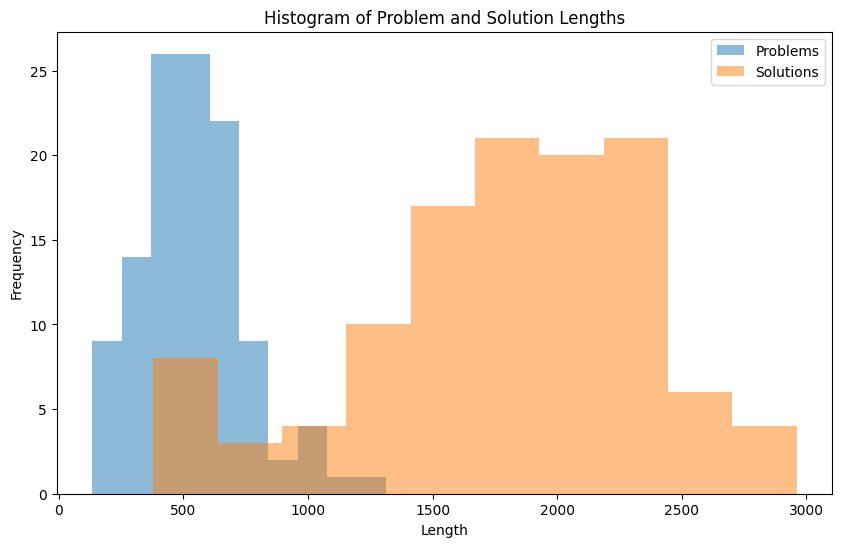

In [ ]:
make_distribution_length_plot(levelC)

In [ ]:
for i, t in enumerate(levelC):
    print(df_experts_23fields_5experts.iloc[i,0], df_experts_23fields_5experts.iloc[i,1])
    print(t,"\n")

David Steiner Waste Management
Problem: With the alarming increase in global waste generation and the rapidly depleting landfill capacity, proper waste management has become an urgent issue that needs to be addressed. Most waste, including recyclable materials, end up in landfills, contributing to greenhouse gas emissions, groundwater contamination, and loss of valuable resources. As an expert in waste management, I identify the inefficient collection, segregation, and utilization of waste materials as the core problem businesses need to tackle in order to move toward circular economy.

Solution: I propose a solution named "Zero-Waste Hubs" that aims to completely utilize waste materials, reduce environmental impact, and generate financial value for businesses. These hubs will be strategically located centers where all types of waste will be collected, sorted, and processed to transform them into valuable resources. A key feature of these hubs will be their integration with local busin

# @Miaomiao, Stella Embedding Comparisons

In [ ]:
from openai.embeddings_utils import get_embedding

In [ ]:
# embedding model parameters
embedding_model = "text-embedding-ada-002"
embedding_encoding = "cl100k_base"  # this the encoding for text-embedding-ada-002
max_tokens = 8000  # the maximum for text-embedding-ada-002 is 8191

In [ ]:
# TODO Build a dataframe named test with a Problem column and a solution Column

In [ ]:
test["embedding_problem"] = test.Problem.apply(lambda x: get_embedding(x, engine=embedding_model))
test["embedding_solution"] = test.Solution.apply(lambda x: get_embedding(x, engine=embedding_model))

test["embedding_problem_array"] = test.embedding_problem.apply(np.array)  # convert string to numpy array
matrix = np.vstack(test.embedding_problem.values)
matrix.shape

In [ ]:
from sklearn.cluster import KMeans

n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42)
kmeans.fit(matrix)
labels = kmeans.labels_
df["Cluster"] = labels

df.groupby("Cluster").Score.mean().sort_values()

Text(0.5, 1.0, 'Clusters identified visualized in language 2d using t-SNE')

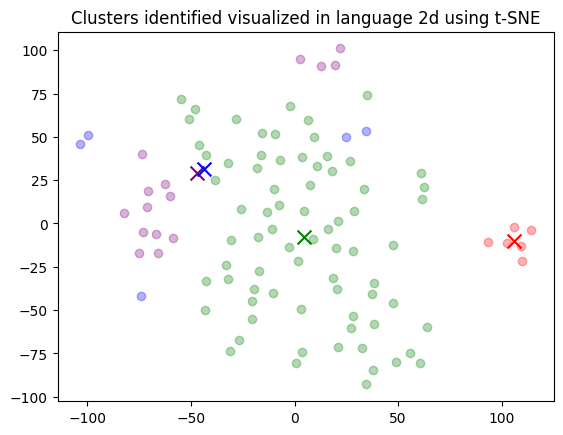

In [ ]:
from sklearn.manifold import TSNE
import matplotlib
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=15, random_state=42, init="random", learning_rate=200)
vis_dims2 = tsne.fit_transform(matrix)

x = [x for x, y in vis_dims2]
y = [y for x, y in vis_dims2]

for category, color in enumerate(["purple", "green", "red", "blue"]):
    xs = np.array(x)[test.Cluster_problem == category]
    ys = np.array(y)[test.Cluster_problem == category]
    plt.scatter(xs, ys, color=color, alpha=0.3)

    avg_x = xs.mean()
    avg_y = ys.mean()

    plt.scatter(avg_x, avg_y, marker="x", color=color, s=100)
plt.title("Clusters identified visualized in language 2d using t-SNE")

Text(0.5, 1.0, 'Clusters identified visualized in language 2d using t-SNE')

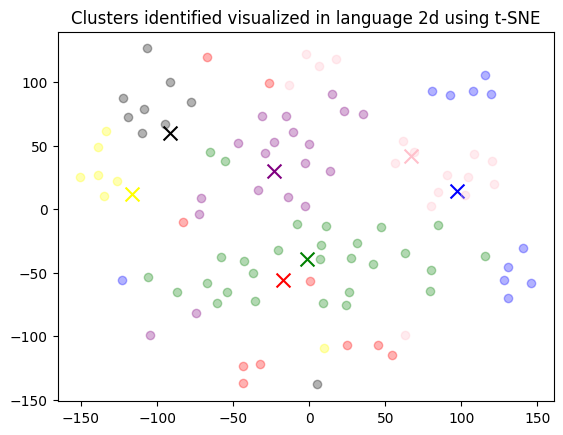

In [ ]:
from sklearn.manifold import TSNE
import matplotlib
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=15, random_state=42, init="random", learning_rate=200)
vis_dims2 = tsne.fit_transform(matrix)

x = [x for x, y in vis_dims2]
y = [y for x, y in vis_dims2]

for category, color in enumerate(["purple", "green", "red", "blue", "yellow", "black", "pink"]):
    xs = np.array(x)[test.Cluster_solution == category]
    ys = np.array(y)[test.Cluster_solution == category]
    plt.scatter(xs, ys, color=color, alpha=0.3)

    avg_x = xs.mean()
    avg_y = ys.mean()

    plt.scatter(avg_x, avg_y, marker="x", color=color, s=100)
plt.title("Clusters identified visualized in language 2d using t-SNE")

In [ ]:
#test.to_csv("test.csv")

In [ ]:
test["embedding_solution_array"] = test.embedding_solution.apply(np.array)  # convert string to numpy array
matrix = np.vstack(test.embedding_solution.values)

from sklearn.cluster import KMeans

n_clusters = 7

kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42)
kmeans.fit(matrix)
labels = kmeans.labels_
test["Cluster_solution"] = labels

test.groupby("Cluster_solution")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.cluster import KMeans

n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42)
kmeans.fit(matrix)
labels = kmeans.labels_
test["Cluster_problem"] = labels

test.groupby("Cluster_problem")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
for i in range(n_clusters):
    print(f"Cluster {i} Theme:", end=" ")

    solutions = "\n".join(
        test[test.Cluster_solution == i]
        .Solution.values
    )
    # response = openai.Completion.create(
    #     engine="text-davinci-003",
    #     prompt=f'What do the following solutions have in common?\n\nSolutions:\n"""\n{solutions}\n"""\n\nTheme:'
    # )
    # print(response["choices"][0]["text"].replace("\n", ""))

    response = openai.ChatCompletion.create(
            model="gpt-4",
            messages=[
                #{"role": "system", "content": default_context},
                {"role": "user", "content": f'What do the following solutions have in common?\n\nSolutions:\n"""\n{solutions}\n"""\n\nTheme:'
}
            ])

        # assuming the response object has a 'choices' attribute that contains the response text,
        # extract the generated text from the response object and append it to the responses list
    print(response['choices'][0]['message']['content'])

    # sample_cluster_rows = df[df.Cluster == i].sample(rev_per_cluster, random_state=42)
    # for j in range(rev_per_cluster):
    #     print(sample_cluster_rows.Score.values[j], end=", ")
    #     print(sample_cluster_rows.Summary.values[j], end=":   ")
    #     print(sample_cluster_rows.Text.str[:70].values[j])

    # print("-" * 100)

Cluster 0 Theme: Improving comfort and reducing discomfort in headphones by incorporating various design inspirations and materials from different fields, such as memory foam, ergonomic shapes, soft fabrics, and pressure-relief technology.
Cluster 1 Theme: All of the mentioned solutions focus on improving the fit, comfort, and customization of headphones and earbuds by drawing inspiration from various existing products and designs in different industries. The main goal of these solutions is to provide a better user experience by accommodating individual preferences and physical differences.
Cluster 2 Theme: The common theme among these solutions is taking inspiration from various industries (aviation, construction, automotive, sportswear, electronics, and camping gear) and applying their materials, technologies, or principles to the design of lightweight and comfortable headphones.
Cluster 3 Theme: All of these solutions are inspired by or borrow ideas from existing designs, materials,

# Old

In [ ]:
# prompt_level_0_default = """ We are excited to announce an opportunity for freelancers to collaborate with researchers at the Digital, Data, and Design Institute at Harvard to source the most innovative and cutting-edge circular economy solutions for the business world.

# Circular Economy is a simple idea.

# Basically it involves sharing, leasing, reusing, repairing, refurbishing and recycling existing materials and products as long as possible.

# We would like you to submit your circular economy idea, which can be a unique new idea or an existent idea that is used in the industry.

# Here is an example: Car Sharing in order to reduce the carbon footprint associated with driving.

# Submit your real-life use cases on how companies can implement the circular economy in their businesses. New ideas are also welcome, even if they are 'moonshots'. Your suggestions will help Harvard researchers understand the impact of the circular economy on business. Let's get creative and revolutionize the world through the circular economy!

# Answer the following two questions to propose a circular economy idea.

# Tell us about the problem your solution is meant to solve.

# Describe the solution in your own words.

# Use the following template to answer:
# Problem: <Randomly choose a number X between 1 and 3. Write X paragraphs.>
# Solution: <Randomly choose a number X between 1 and 5. Write X paragraphs.>

# Your goal is to win the top monetary prizes by maximizng the following evaluation criteria.
# Our team will be evaluating your entries using the following criteria:
# * Novelty (How different is it from existing solutions?)
# * Environmental Impact (How much does it benefit the planet?)
# * Financial Impact (What financial value can it create for businesses?)
# * Feasibility and Scalability of Implementation (How likely is it to succeed and how scalable is it?)
# """

# default_context_level0 = """You are a recurring customer of the headphone brand Philips. The company just sent you out a crowdsourcing proposition to collect ideas. You have an opportunity to win a shirt and a new pair of headphones and decide to participate in the challenge.\n"""

Earlier attempt:

prompt_level_0_default = """ We are excited to announce an opportunity for freelancers to collaborate with researchers at the Digital, Data, and Design Institute at Harvard to source the most innovative and cutting-edge circular economy solutions for the business world.

Circular Economy is a simple idea.

Basically it involves sharing, leasing, reusing, repairing, refurbishing and recycling existing materials and products as long as possible.

We would like you to submit your circular economy idea, which can be a unique new idea or an existent idea that is used in the industry.

Here is an example: Car Sharing in order to reduce the carbon footprint associated with driving.

Submit your real-life use cases on how companies can implement the circular economy in their businesses. New ideas are also welcome, even if they are 'moonshots'. Your suggestions will help Harvard researchers understand the impact of the circular economy on business. Let's get creative and revolutionize the world through the circular economy!

Answer the following two questions to propose a circular economy idea.

Problem: Tell us about the problem your solution is meant to solve.

Solution: Describe the solution in your own words.

Use the following template to answer:
Problem: <Write two paragraphs.>/n
Solution: <Write three paragraphs.>/n

Your goal is to win the top monetary prizes by satisfying to the maximum the following evaluation criteria.
* Novelty (How different is it from existing solutions?)
* Environmental Impact (How much does it benefit the planet?)
* Financial Impact (What financial value can it create for businesses?)
* Feasibility and Scalability of Implementation (How likely is it to succeed and how scalable is it?)
"""

default_context_level0 = """You are a recurring customer of the headphone brand Philips. The company just sent you out a crowdsourcing proposition to collect ideas. You have an opportunity to win a shirt and a new pair of headphones and decide to participate in the challenge.\n"""